In [ ]:
!pip install -q transformers # 허깅페이스 라이브러리임

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
%cd /content/drive/MyDrive

/content/drive/MyDrive


In [30]:
# 모델 다운
from transformers import CLIPSegProcessor, CLIPSegForImageSegmentation

processor = CLIPSegProcessor.from_pretrained("CIDAS/clipseg-rd64-refined")
model = CLIPSegForImageSegmentation.from_pretrained("CIDAS/clipseg-rd64-refined")

In [36]:
# 예시 이미지 (세그먼트할 대상)
from PIL import Image

img1 = Image.open('lab_img1.jpg')
img2 = Image.open('lab_img2.jpg')

In [26]:
# 세그먼트할 텍스트 카테고리 정의
prompts = ["glasses", "mouth", "eyes", "hair"]

In [31]:
# 프롬프트 전처리하고 모델에 넘겨주고 예측
import torch

inputs = processor(text=prompts, images=[img1] * len(prompts), padding="max_length", return_tensors="pt")

# predict
with torch.no_grad():
  outputs = model(**inputs)
preds = outputs.logits.unsqueeze(1)

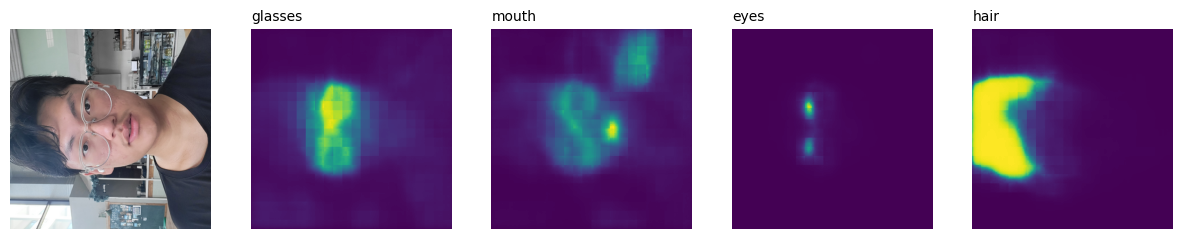

In [33]:
import matplotlib.pyplot as plt

_, ax = plt.subplots(1, len(prompts) + 1, figsize=(3*(len(prompts) + 1), 4))
[a.axis('off') for a in ax.flatten()]
ax[0].imshow(img1)
[ax[i+1].imshow(torch.sigmoid(preds[i][0])) for i in range(len(prompts))];
[ax[i+1].text(0, -15, prompt) for i, prompt in enumerate(prompts)];

In [34]:
import torch

encoded_image = processor(images=[img1], return_tensors="pt")
encoded_prompt = processor(images=[img2], return_tensors="pt")

# predict
with torch.no_grad():
  outputs = model(**encoded_image, conditional_pixel_values=encoded_prompt.pixel_values)
preds = outputs.logits.unsqueeze(1)
preds = torch.transpose(preds, 0, 1)

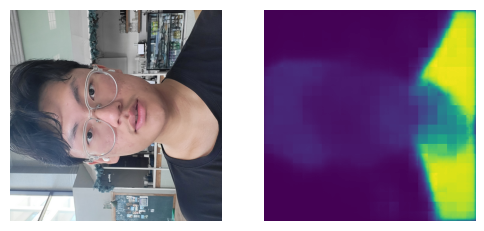

In [37]:
_, ax = plt.subplots(1, 2, figsize=(6, 4))
[a.axis('off') for a in ax.flatten()]
ax[0].imshow(img1)
ax[1].imshow(torch.sigmoid(preds[0]))

#um..